<h1><center> Telecom Churn Prediction</center></h1>

<b><u><h2>Problem Statement :</h2></u></b> <br>

- Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.<br>

- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.<br>
- It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [688]:
train_data = pd.read_csv('Churn_train.csv')
test_data = pd.read_csv('Churn_test.csv')
print(train_data.shape)
print(test_data.shape)

(5634, 21)
(1409, 20)


In [689]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [690]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


## Dataset Description

<table>							
<th>	Columns Name	</th>	<th>	Description	</th>		
<tr>	<td>	CustomerID	</td>	<td>	Passenger Identity	</td>	</tr>
<tr>	<td>	Gender	</td>	<td>	Whether the customer is a male or a female	</td>	</tr>
<tr>	<td>	SeniorCitizen	</td>	<td>	Whether the customer is a senior citizen or not (1, 0)	</td>	</tr>
<tr>	<td>	Partner	</td>	<td>	Whether the customer has a partner or not (Yes, No)	</td>	</tr>
<tr>	<td>	Dependents	</td>	<td>	Whether the customer has dependents or not (Yes, No)	</td>	</tr>
<tr>	<td>	Tenure	</td>	<td>	Number of months the customer has stayed with the company	</td>	</tr>
<tr>	<td>	PhoneService	</td>	<td>	Whether the customer has a phone service or not (Yes, No)	</td>	</tr>
<tr>	<td>	MultipleLines	</td>	<td>	Whether the customer has multiple lines or not (Yes, No, No phone service)	</td>	</tr>
<tr>	<td>	InternetService	</td>	<td>	Customer’s internet service provider (DSL, Fiber optic, No)	</td>	</tr>
<tr>	<td>	OnlineSecurity	</td>	<td>	Whether the customer has online security or not (Yes, No, No internet service)	</td>	</tr>
<tr>	<td>	OnlineBackup	</td>	<td>	Whether the customer has online backup or not (Yes, No, No internet service)	</td>	</tr>
<tr>	<td>	DeviceProtection	</td>	<td>	Whether the customer has device protection or not (Yes, No, No internet service)	</td>	</tr>
<tr>	<td>	TechSupport	</td>	<td>	Whether the customer has tech support or not (Yes, No, No internet service)	</td>	</tr>
<tr>	<td>	StreamingTV	</td>	<td>	Whether the customer has streaming TV or not (Yes, No, No internet service)	</td>	</tr>
<tr>	<td>	StreamingMovies	</td>	<td>	Whether the customer has streaming movies or not (Yes, No, No internet service)	</td>	</tr>
<tr>	<td>	Contract	</td>	<td>	The contract term of the customer (Month-to-month, One year, Two year)	</td>	</tr>
<tr>	<td>	PaperlessBilling	</td>	<td>	Whether the customer has paperless billing or not (Yes, No)	</td>	</tr>
<tr>	<td>	PaymentMethod	</td>	<td>	The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))	</td>	</tr>
<tr>	<td>	MonthlyCharges	</td>	<td>	The amount charged to the customer monthly	</td>	</tr>
<tr>	<td>	TotalCharges	</td>	<td>	The total amount charged to the customer	</td>	</tr>
<tr>	<td>	Churn	</td>	<td>	Whether the customer churned or not (Yes or No)	</td>	</tr>
</table>




# Profiling of Train Dataset

In [691]:
from pandas_profiling import profile_report

In [692]:
Report = train_data.profile_report(title = 'Churn_Prediction')

In [693]:
#Report.to_file('Churn_Predication.html')

# Dataset Information

- Number of variables	21
- Number of observations	5634
- Missing cells	0
- Duplicate rows	0

<h2> Variable types </h2>

- Categorical	14
- Boolean	5
- Numeric	2

<br>

- 1 Customer Id -  Unique ID of the Customer<br>

- 2 Gender - Boolean Value with Male and Female almost Equal Split<br>

- 3 Senior Citizen -  It is flag with 1 and 0. 17% of Customers are Senior Citizen in the dataset<br>

- 4 Partner - Again Boolean Variable with 48% Customers have Partner<br>

- 5 Dependents - Boolean Variable with 30% Customer has dependents

- 6 Tenure -  Numeric Columns with Minimum Range - 0Months and Max - 72Months. Mean and Median are almost close to each other

- 7 - Phone Service -   Boolean Value. Yes and No. 90% of the customer has phone service(Yes)

- 8 -  Multiple Lines - 3 Values , Yes(42%) , No(48% )& No Phone Service(10%)

- 9 - Internet Service - Customer ISP - 3 Values , Fiber(44%), DSL(34) & No(22%)

- 10 - Online Security - 3 Values Yes -(28%) , No(50%) -  & No Service Provider (22%)  

- 11 - Online Backup - 3 Values Yes -(34%) , No(44%) -  & No Service Provider (22%)  

- 12 - Device Protection - 3 Values Yes -(34%) , No(44%) -  & No Service Provider (22%)  

- 13 - Tech Support - 3 Values Yes -(29%) , No(49%) -  & No Service Provider (22%)  

- 14 - Streaming TV - 3 Values Yes -(38%) , No(40%) -  & No Service Provider (22%)  

- 15 - Streaming Movies - 3 Values Yes -(39%) , No(39%) -  & No Service Provider (22%)  

- 16 - Contract - M2M -(55%) , One Yeaer - (21%)  & Two Year (24%)

- 17 - PaperLess Billing -  Boolean - Yes (59%) & No (41%)

- 18 - Payment Method - 4 Values - 1) Electronic Check 2) Mailed Check and 3 & 4 - Bank Transfer and CC

- 19 - Monthly Charges -  Numeric - Min - 18.25 , Median -  70.4 and Max - 118.65.

- 20 - Total Charges - Object Needs to be converted to Integer

- 21 - <b> <u> <i>Churn </i></u> </b> - Target Variable - Seems Imbalanced Dataset - No - 74% and Yes 26%





# Data Preprocessing

### TotalCharges conversion from str to Float

In [694]:
train_data['TotalCharges']= pd.to_numeric(train_data['TotalCharges'],errors='coerce').astype(float)

In [695]:
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

- Removing Null Values from the train_data

In [696]:
train_data.dropna(how='any',inplace=True)

In [697]:
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- As Churn Data is in Object form(Yes/No) need to convert it to 1's and 0's

In [698]:
train_data['Churn'] = train_data['Churn'].apply(lambda x : 1 if x=='Yes' else 0 ).astype(float)

In [699]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000
mean,0.162105,32.323854,64.810380,2280.662380,0.270352
std,0.368579,24.542455,30.103988,2266.394623,0.444181
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.450000,391.900000,0.000000
50%,0.000000,29.000000,70.400000,1394.800000,0.000000
75%,0.000000,55.000000,89.850000,3794.487500,1.000000
max,1.000000,72.000000,118.650000,8684.800000,1.000000


#  EDA - Exploratory Data Analysis

## Univariate & Multivariate Analysis

### 1 - Distribution of Gender/Partner/Dependents/SeniorCitizens.

<AxesSubplot:ylabel='Dependents'>

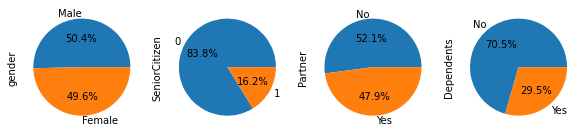

In [700]:
f,axes = plt.subplots(1,4,figsize=(10,12))
train_data['gender'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
train_data['SeniorCitizen'].value_counts().plot(kind='pie',ax=axes[1],autopct='%1.1f%%')
train_data['Partner'].value_counts().plot(kind='pie',ax=axes[2],autopct='%1.1f%%')
train_data['Dependents'].value_counts().plot(kind='pie',ax=axes[3],autopct='%1.1f%%')

*  Male and Female have almost equal proportion
*  Most of the customers are younger in age due to less contribution of Senior Citizen
*  Almost Half of the base have Partners
*  Most of the Customers don't have dependets

In [701]:
train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 2 - Distribution of Other Categorical Variables

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mailed check'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Electronic check')])

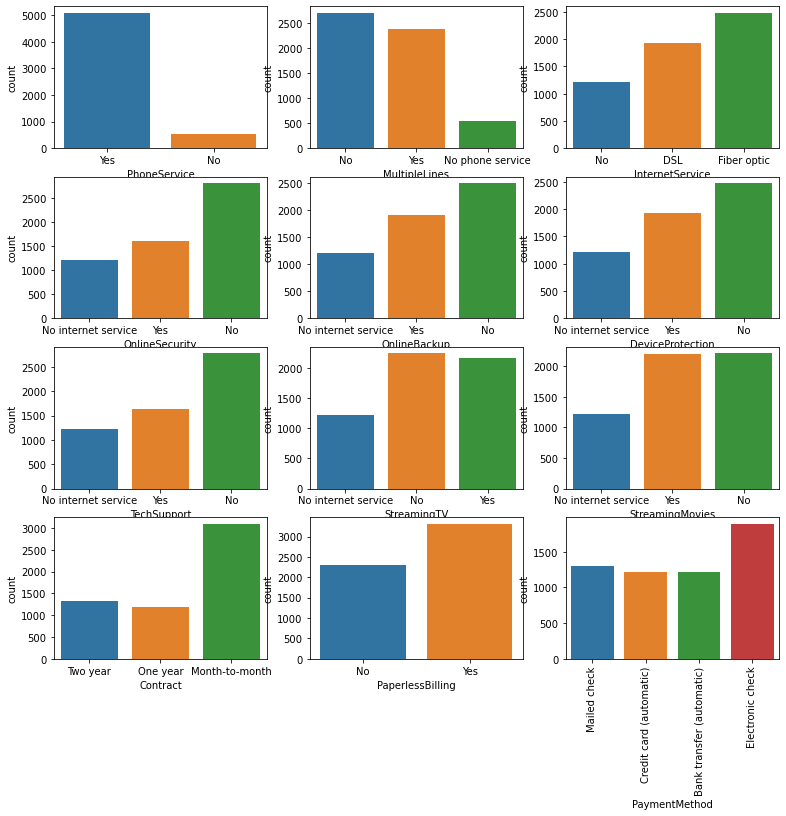

In [702]:
f,axes = plt.subplots(4,3,figsize=(13,12)) ## Details of the analysis also explained in Data Description Above
sns.countplot(data=train_data,x='PhoneService', ax = axes[0,0])
sns.countplot(data=train_data,x='MultipleLines', ax = axes[0,1])
sns.countplot(data=train_data,x='InternetService', ax = axes[0,2])
sns.countplot(data=train_data,x='OnlineSecurity', ax = axes[1,0])
sns.countplot(data=train_data,x='OnlineBackup', ax = axes[1,1])
sns.countplot(data=train_data,x='DeviceProtection', ax = axes[1,2])
sns.countplot(data=train_data,x='TechSupport', ax = axes[2,0])
sns.countplot(data=train_data,x='StreamingTV', ax = axes[2,1])
sns.countplot(data=train_data,x='StreamingMovies', ax = axes[2,2])
sns.countplot(data=train_data,x='Contract', ax = axes[3,0])
sns.countplot(data=train_data,x='PaperlessBilling', ax = axes[3,1])
sns.countplot(data=train_data,x='PaymentMethod', ax = axes[3,2])
plt.xticks(rotation=90)

### 3 - Tenure Distribution

<AxesSubplot:xlabel='tenure', ylabel='Count'>

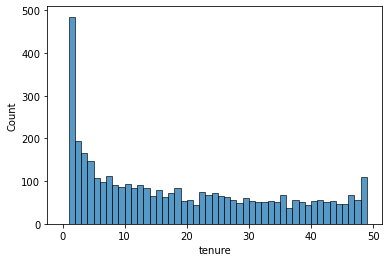

In [703]:
sns.histplot(train_data.tenure,bins=np.arange(0,50,1))

- By Looking at histogram of Tenure, we can see most of the customer are within company with less than 1Month Tenure

To understand better, let us try to see the same relationship with Churn Variable



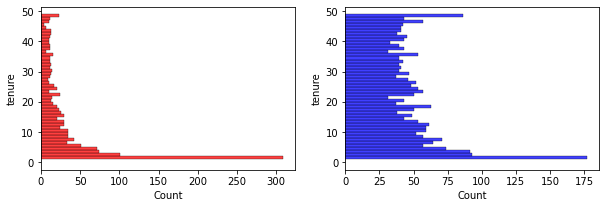

In [704]:
f,axes = plt.subplots(1,2,figsize=(10,3))
sns.histplot(y=train_data.tenure[train_data['Churn']==1],bins=np.arange(0,50,1),color='red',ax = axes[0]);
sns.histplot(y=train_data.tenure[train_data['Churn']==0],bins=np.arange(0,50,1),color='blue',ax=axes[1]);

- <b>Chart Clearly shows that Customer who has churned have been there with the company for less than 1month.</b>

### 4 - Relationship of TotalCharges and MonthlyCharges 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

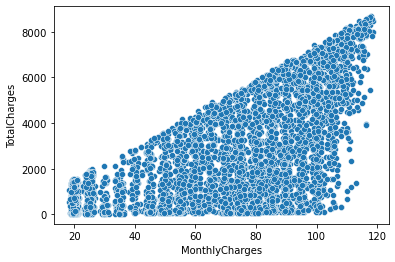

In [705]:
sns.scatterplot(data=train_data,y='TotalCharges',x='MonthlyCharges')

- <b>Total Charges Increases as Monthly Charges Increases</b>

### 5 - Contract relationship with Churn Variable

<AxesSubplot:xlabel='count', ylabel='Contract'>

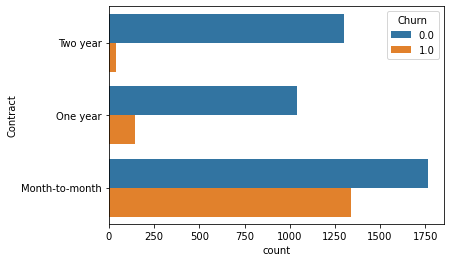

In [706]:
sns.countplot(data=train_data,y='Contract',hue='Churn') 

- #### Major Churned Customers are from Month to Month Contract

### 6 - Churn Relationship with Other Variables

In [707]:
# 1 - Gender
train_data[['gender','Churn']].value_counts() ### Almost equal Distribution in both Male and Females

gender  Churn
Male    0.0      2086
Female  0.0      2019
        1.0       774
Male    1.0       747
dtype: int64

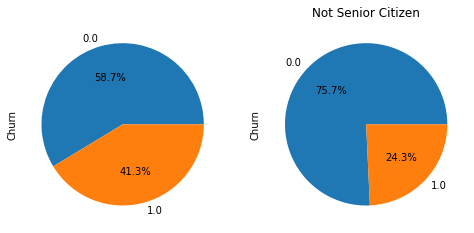

In [708]:
# 2 - Senior Citizen
f,axes = plt.subplots(1,2,figsize=(8,5))

plt.title('Senior Citizen')
train_data[train_data['SeniorCitizen']==1]['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax = axes[0],);
plt.title('Not Senior Citizen')
train_data[train_data['SeniorCitizen']==0]['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1]);

####  Almost 40% of Senior Citizens in the Dataset have churned compared to Non Senior Citizen

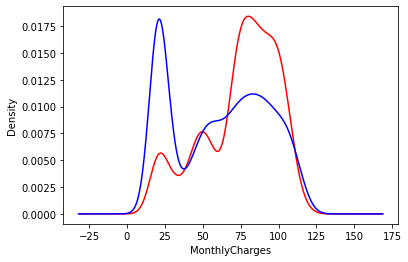

In [709]:
# 3 - MonthlyCharges 
plt.xlabel('MonthlyCharges')

train_data[train_data['Churn']==1]['MonthlyCharges'].plot(kind='kde',color='red');

train_data[train_data['Churn']==0]['MonthlyCharges'].plot(kind='kde',color='blue');


#### Churn is higher in the segment when the Month Charges are high

In [710]:
#4 - MultipleLines
train_data.groupby(by=['MultipleLines','Churn'])['customerID'].count()/len(train_data)*100 # No Major Relationship can be established with Target variable 

MultipleLines     Churn
No                0.0      35.584785
                  1.0      12.353359
No phone service  0.0       7.340917
                  1.0       2.346250
Yes               0.0      30.039104
                  1.0      12.335585
Name: customerID, dtype: float64

In [711]:
#5 - Internet Service 
train_data.groupby(by=['InternetService','Churn'])['customerID'].count()/len(train_data)*100# FiberOptic 

InternetService  Churn
DSL              0.0      27.692855
                 1.0       6.612158
Fiber optic      0.0      25.328830
                 1.0      18.734447
No               0.0      19.943121
                 1.0       1.688589
Name: customerID, dtype: float64

#### Customer having Fiber Optic have Churned more compared to Other Categories

### To Understand remaining Variables, We Will convert Categorical Variable into numerical Variable and use Coorealtion Matrix

In [712]:
CoMatrix = pd.get_dummies(train_data.drop('customerID',axis=1),drop_first=True)

In [713]:
plt.figsize=(10,5)
CoMatrix.corr()['Churn'].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.309381
PaymentMethod_Electronic check           0.297480
MonthlyCharges                           0.196372
PaperlessBilling_Yes                     0.183856
SeniorCitizen                            0.141643
StreamingMovies_Yes                      0.066841
StreamingTV_Yes                          0.058370
MultipleLines_Yes                        0.040073
PhoneService_Yes                         0.020758
gender_Male                             -0.015134
MultipleLines_No phone service          -0.020758
DeviceProtection_Yes                    -0.064579
OnlineBackup_Yes                        -0.085263
PaymentMethod_Mailed check              -0.093479
PaymentMethod_Credit card (automatic)   -0.125179
Partner_Yes                             -0.140087
Dependents_Yes                          -0.151197
TechSupport_Yes                         -0.158300
OnlineSecurity_Yes                      -0.166286


##### - Positive Corelated Variables with respect to Churn - 1) ISP=Fiber,2)PaymentMode-EC,3)MonthlyCharges
##### - Negative Corelated Variables with respect to Churn - 1) Tenure,2)2yearContract,3)NoInternetService

# Modelling Part - Logistic Regression (Binary Classificaion)

##### Splitting into X_train and Y_train

In [714]:
X_train = CoMatrix.drop('Churn',axis=1)
y_train = CoMatrix['Churn']

In [715]:
print(X_train.shape)
print(y_train.shape)

(5626, 30)
(5626,)


##### Importing All necessary Sklearn Libraries

In [716]:
from sklearn.preprocessing import StandardScaler ## For Scaling Purpose
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression

##### Scaling X_Train

In [717]:
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)

In [718]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5626.0,6.964449e-16,1.000089,-0.439848,-0.439848,-0.439848,-0.439848,2.273513
tenure,5626.0,8.100721e-17,1.000089,-1.276426,-0.950432,-0.135445,0.924038,1.616777
MonthlyCharges,5626.0,6.414715e-17,1.000089,-1.546789,-0.975385,0.185694,0.831845,1.788614
TotalCharges,5626.0,-7.106138e-17,1.000089,-0.998089,-0.833452,-0.390903,0.668004,2.825945
gender_Male,5626.0,2.641170e-16,1.000089,-1.007135,-1.007135,0.992915,0.992915,0.992915
Partner_Yes,5626.0,8.188733e-16,1.000089,-0.959237,-0.959237,-0.959237,1.042495,1.042495
Dependents_Yes,5626.0,-1.814325e-16,1.000089,-0.646408,-0.646408,-0.646408,1.547012,1.547012
PhoneService_Yes,5626.0,-6.120435e-16,1.000089,-3.053348,0.327509,0.327509,0.327509,0.327509
MultipleLines_No phone service,5626.0,7.899041e-16,1.000089,-0.327509,-0.327509,-0.327509,-0.327509,3.053348
MultipleLines_Yes,5626.0,1.878459e-16,1.000089,-0.857525,-0.857525,-0.857525,1.166147,1.166147


##### Building the Logistic Regression Model and predicting the Train Variable to check the accuracy Score

In [719]:
LogReg = LogisticRegression()

In [720]:
result = LogReg.fit(X_train,y_train)

In [721]:
pred = LogReg.predict(X_train)

In [743]:
accuracy = accuracy_score(y_train,pred)
accuracy*100

80.48346960540349

# Working on Predicting the TestVariables

In [723]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [724]:
test_data['TotalCharges']= pd.to_numeric(test_data['TotalCharges'],errors='coerce').astype(float)

In [725]:
test_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [726]:
test_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1409.000000,1406.000000
mean,0.163236,32.743790,64.691980,2293.856437
std,0.369712,24.581736,30.040784,2269.054321
min,0.000000,0.000000,18.700000,19.200000
25%,0.000000,9.000000,36.850000,423.687500
50%,0.000000,29.000000,70.150000,1413.550000
75%,0.000000,56.000000,89.850000,3791.875000
max,1.000000,72.000000,118.750000,8672.450000


In [727]:
test_data['TotalCharges'].fillna(test_data['TotalCharges'].median(), inplace=True)

In [728]:
test_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [729]:
test_data.shape

(1409, 20)

In [730]:
X_test = test_data.drop('customerID',axis=1)

In [731]:
X_test = pd.get_dummies(X_test,drop_first=True)

In [732]:
print(X_test.shape)

(1409, 30)


In [733]:
X_test.columns == X_train.columns ## Checking the list column Name

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#### Scaling the X_Test by using Standard Scaler Transform Method

In [734]:
X_test[X_test.columns] = SS.transform(X_test)

In [735]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,1409.0,0.003071,1.003163,-0.439848,-0.439848,-0.439848,-0.439848,2.273513
tenure,1409.0,0.017112,1.001690,-1.317176,-0.950432,-0.135445,0.964787,1.616777
MonthlyCharges,1409.0,-0.003933,0.997989,-1.531840,-0.928876,0.177388,0.831845,1.791936
TotalCharges,1409.0,0.004995,1.000356,-0.997912,-0.818118,-0.382630,0.663376,2.820495
gender_Male,1409.0,0.010634,1.000223,-1.007135,-1.007135,0.992915,0.992915,0.992915
Partner_Yes,1409.0,0.035236,1.001201,-0.959237,-0.959237,-0.959237,1.042495,1.042495
Dependents_Yes,1409.0,0.044776,1.019342,-0.646408,-0.646408,-0.646408,1.547012,1.547012
PhoneService_Yes,1409.0,0.003580,0.995455,-3.053348,0.327509,0.327509,0.327509,0.327509
MultipleLines_No phone service,1409.0,-0.003580,0.995455,-0.327509,-0.327509,-0.327509,-0.327509,3.053348
MultipleLines_Yes,1409.0,-0.018756,0.997279,-0.857525,-0.857525,-0.857525,1.166147,1.166147


In [736]:
Pred_Final = LogReg.predict(X_test)

In [737]:
Pred_Final.shape

(1409,)

In [738]:
Final_OP = pd.DataFrame(test_data['customerID'])

In [739]:
Final_OP['Churn'] = Pred_Final

In [740]:
Final_OP['Churn'] = Final_OP['Churn'].apply(lambda x : 'Yes' if x==1 else 'No')

In [741]:
Final_OP['Churn'].value_counts()

No     1085
Yes     324
Name: Churn, dtype: int64

In [742]:
Final_OP.to_csv('Submission.csv',index=False,header=False)